# Notebook Imports

In [1]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

%matplotlib inline

# Gather Data

In [2]:
boston_dataset=load_boston()

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [5]:
data=pd.DataFrame(data=boston_dataset.data,columns=boston_dataset.feature_names)

data['PRICE']=boston_dataset.target

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


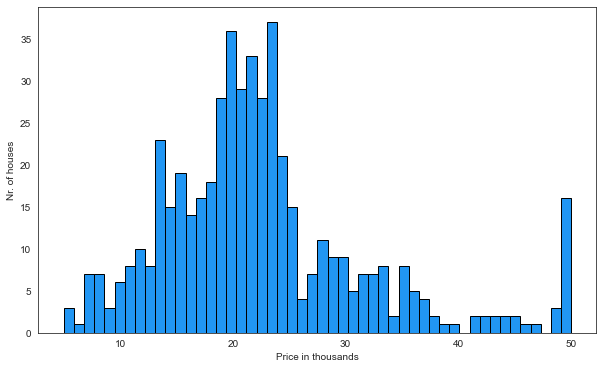

1.1080984082549072

In [41]:
plt.figure(figsize=(10,6))
plt.hist(data['PRICE'],bins=50,ec='black',color='#2196f3')
plt.xlabel('Price in thousands')
plt.ylabel('Nr. of houses')
plt.show()
data['PRICE'].skew()

<Figure size 720x432 with 0 Axes>

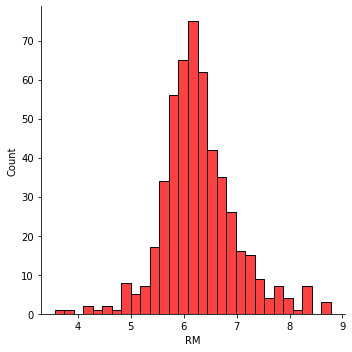

In [10]:
plt.figure(figsize=(10,6))
sns.displot(data['RM'],color='red',kind='hist')
plt.show()

In [11]:
data['RM'].mean()

6.284634387351787

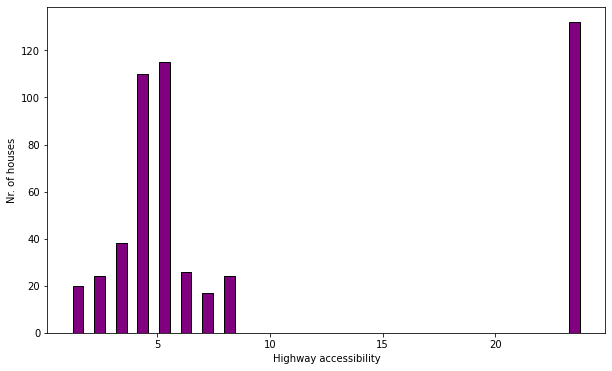

In [12]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],bins=24,ec='black',color='purple',rwidth=0.5)
plt.xlabel('Highway accessibility')
plt.ylabel('Nr. of houses')
plt.show()

In [13]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

# Descriptive statistics

In [14]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Correlation
## $$ \rho _{XY}= corr(X,Y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0 $$

In [15]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [16]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [17]:
data.corr() # Carl Pearsons correlation coefficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [18]:
mask=np.zeros_like(data.corr())
triange_indicies=np.triu_indices_from(mask)
mask[triange_indicies]=True

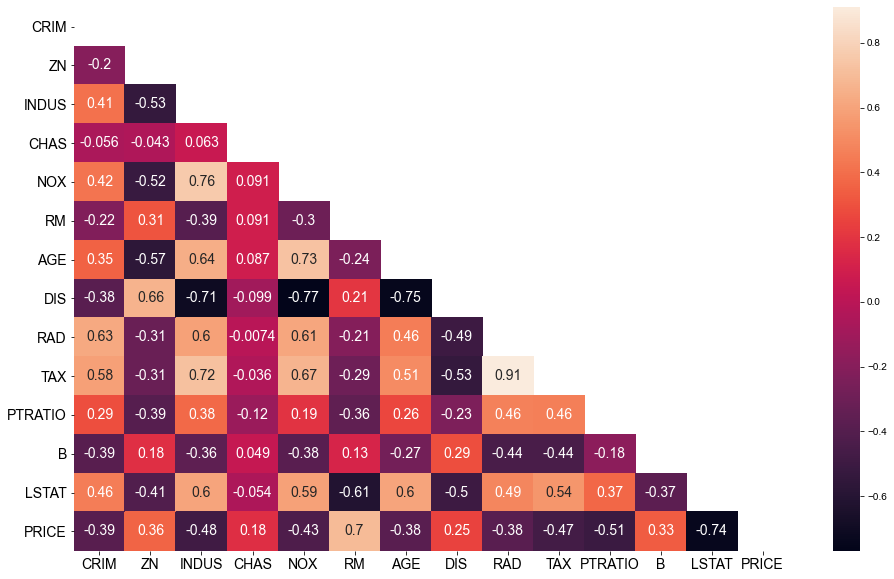

In [19]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":14})
sns.set_style("white")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

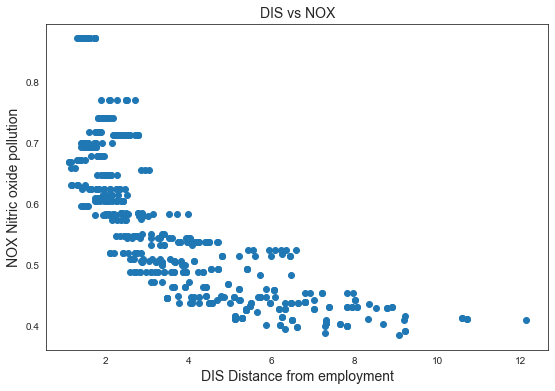

In [20]:
plt.figure(figsize=(9,6))
plt.title("DIS vs NOX",fontsize=14)
plt.xlabel("DIS Distance from employment",fontsize=14)
plt.ylabel("NOX Nitric oxide pollution",fontsize=14)
plt.scatter(data['DIS'],data["NOX"])
plt.show()

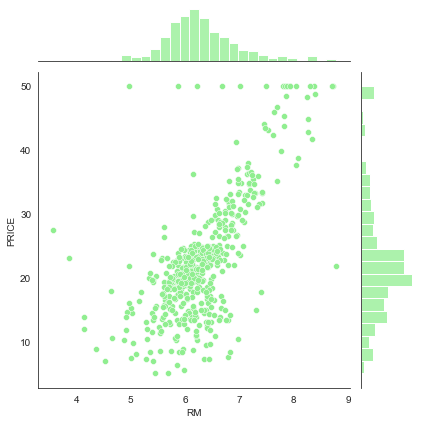

In [21]:
sns.jointplot(x='RM',y='PRICE',data=data,color='lightgreen')
plt.show()

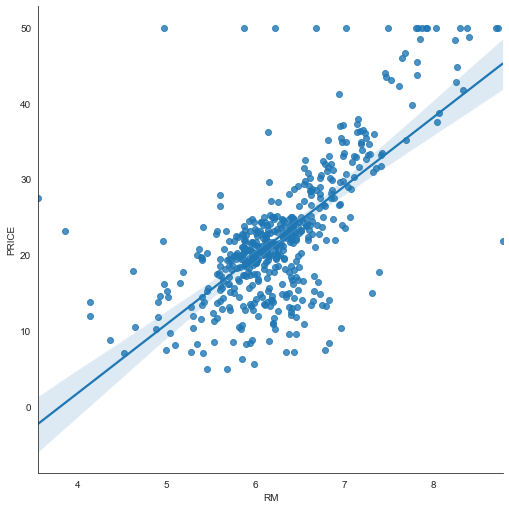

In [22]:
sns.lmplot(x='RM',y='PRICE',data=data,height=7)
plt.show()

In [23]:
prices=data['PRICE']
features=data.drop('PRICE',axis=1)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(features,prices,train_size=0.2,random_state=10)

len(X_train)/len(features)

0.19960474308300397

In [25]:
regr=LinearRegression()
regr.fit(X_train,y_train)

print('Training r-squared:',regr.score(X_train,y_train))
print("Test r-squared:",regr.score(X_test,y_test))

print("Intercept is",regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coeff'])

Training r-squared: 0.7055270183105737
Test r-squared: 0.6859875551074265
Intercept is 44.701017078468894


,coeff
CRIM,0.126965
ZN,0.081974
INDUS,0.026207
CHAS,2.753598
NOX,-26.900142
RM,2.714834
AGE,0.025141
DIS,-1.793909
RAD,0.127401
TAX,-0.004688


In [26]:
log_prices=np.log(data['PRICE'])
features=data.drop('PRICE',axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,log_prices,train_size=0.2,random_state=10)

regr=LinearRegression()
regr.fit(X_train,y_train)

print('Training r-squared:',regr.score(X_train,y_train))
print("Test r-squared:",regr.score(X_test,y_test))

print("Intercept is",regr.intercept_)
pd.DataFrame(data=regr.coef_,index=X_train.columns,columns=['coeff'])
print(log_prices.skew())

Training r-squared: 0.7655355271926741
Test r-squared: 0.7027819377774174
Intercept is 3.913426123831515
-0.33032129530987864


In [27]:
X_incl_const=sm.add_constant(X_train)

model=sm.OLS(y_train,X_incl_const)

results=model.fit()

pd.DataFrame({'coeff':results.params,'p-values':round(results.pvalues,3)})

,coeff,p-values
const,3.913426,0.000
CRIM,0.003328,0.674
ZN,0.002070,0.057
INDUS,0.003631,0.489
CHAS,0.082147,0.271
NOX,-0.974338,0.004
RM,0.092771,0.038
AGE,0.000426,0.740
DIS,-0.054978,0.005
RAD,0.010074,0.131


In [28]:
VIF(exog=X_incl_const.values,exog_idx=1)

for i in range(1,X_incl_const.shape[1]):
    print(VIF(exog=X_incl_const.values,exog_idx=i))

4.411367576004217
2.5171921673294784
4.075505022467617
1.1561046171115126
4.617890162616478
2.337496430715554
4.1842476605267125
4.616569569207625
10.440995598948648
8.634768931435389
1.8215294456305728
1.7717501840669132
3.4012966777008518


In [29]:
vif = [VIF(exog=X_incl_const.values, exog_idx=i)
       for i in range(X_incl_const.shape[1])]
print(vif)


[731.1265870262521, 4.411367576004217, 2.5171921673294784, 4.075505022467617, 1.1561046171115126, 4.617890162616478, 2.337496430715554, 4.1842476605267125, 4.616569569207625, 10.440995598948648, 8.634768931435389, 1.8215294456305728, 1.7717501840669132, 3.4012966777008518]


In [30]:
pd.DataFrame({'coef_name':X_incl_const.columns,'vif':np.round(vif,2)})

,coef_name,vif
0,const,731.13
1,CRIM,4.41
2,ZN,2.52
3,INDUS,4.08
4,CHAS,1.16
5,NOX,4.62
6,RM,2.34
7,AGE,4.18
8,DIS,4.62
9,RAD,10.44


In [31]:
X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-2.435859195869014
0.7655355271926738


In [32]:
X_incl_const_removed_INDUS = sm.add_constant(X_incl_const.drop('INDUS',axis=1))

model = sm.OLS(y_train, X_incl_const_removed_INDUS)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-6.491989733800608
0.7642342732403091


In [33]:
X_incl_const_AGE = sm.add_constant(X_incl_const.drop('AGE',axis=1))

model = sm.OLS(y_train, X_incl_const_AGE)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-6.922481102652796
0.7652370367708994


In [34]:
X_incl_const_CRIM = sm.add_constant(X_incl_const.drop('CRIM',axis=1))

model = sm.OLS(y_train, X_incl_const_CRIM)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-6.844685104641087
0.7650561391999015


In [35]:
X_incl_const_CHAS = sm.add_constant(X_incl_const.drop('CHAS',axis=1))

model = sm.OLS(y_train, X_incl_const_CHAS)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-5.634633602749659
0.7622244162702017


In [36]:
X_incl_const_AGE=X_incl_const.drop('AGE',axis=1)
X_incl_const_filtered= sm.add_constant(X_incl_const_AGE.drop('INDUS',axis=1))

model = sm.OLS(y_train, X_incl_const_CRIM)

results = model.fit()

orginal = pd.DataFrame({'coeff': results.params, 'p-values': round(
    results.pvalues, 3)})
orginal
print(results.bic)
print(results.rsquared)

-6.844685104641087
0.7650561391999015


# CONCLUSION FOR REDUCTION IN MODEL
## WE CAN SAFELY DROP AGE,INDUS PARAMETERS 

# TEST OF MODEL AGAINST ACTUAL VALUES

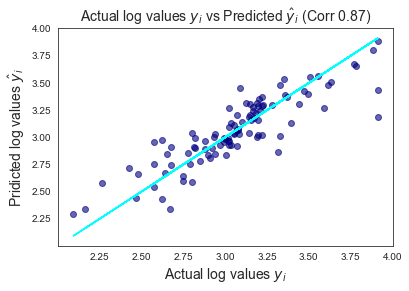

In [37]:
log_prices=np.log(data['PRICE'])
features=data.drop(['PRICE','AGE','INDUS'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,log_prices,train_size=0.2,random_state=10)

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

corr=round(y_train.corr(results.fittedvalues),2)

plt.title(f"Actual log values $y_i$ vs Predicted $\hat y _i$ (Corr {corr})",fontsize=14)
plt.xlabel("Actual log values $y_i$",fontsize=14)
plt.ylabel("Pridicted log values $\hat y_i$",fontsize=14)
plt.scatter(y_train,results.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,c='cyan')
plt.show()

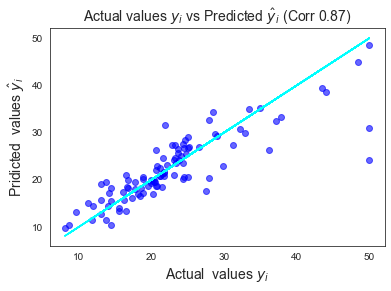

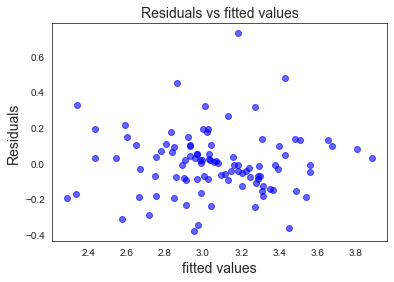

In [38]:
log_prices=np.log(data['PRICE'])
features=data.drop(['PRICE','AGE','INDUS'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(features,log_prices,train_size=0.2,random_state=10)

X_incl_const = sm.add_constant(X_train)

model = sm.OLS(y_train, X_incl_const)

results = model.fit()

plt.title(f"Actual values $y_i$ vs Predicted $\hat y _i$ (Corr {corr})",fontsize=14)
plt.xlabel("Actual  values $y_i$",fontsize=14)
plt.ylabel("Pridicted  values $\hat y_i$",fontsize=14)
plt.scatter(np.e**y_train,np.e**results.fittedvalues,c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,c='cyan')
plt.show()

plt.title("Residuals vs fitted values",fontsize=14)
plt.xlabel("fitted values",fontsize=14)
plt.ylabel("Residuals",fontsize=14)
plt.scatter(results.fittedvalues,results.resid,c='blue',alpha=0.6)
plt.show()

In [39]:
# ACCESS_TOKEN = '03aa402e55133edd7781b0e193fcd7a1e85dc0a6'


# long_url = input()
# url_shortener = Shortener( api_key = ACCESS_TOKEN) 
# print ("Short URL is {}".format(url_shortener.bitly.short(long_url)))

In [40]:
# def contains(num,numList):
#     low = 0
#     high = len(numList) - 1
#     mid = 0
 
#     while low <= high:
 
#         mid = (high + low) // 2

#         if numList[mid] < num:
#             low = mid + 1
 
#         elif numList[mid] > num:
#             high = mid - 1
 
#         else:
#             return True
 
#     return False

# inNum=input('Please enter the number you want to search in the list:')
# numList=[100,200,600,456,890,1090,2500]
# print('Your entered num: '+str(inNum)+', Result of search: '+str(contains(int(inNum),numList)))
 